## Question 1
implement a FA function with parameters: the dataset and the desired numbers of factors. These part is a bit like the PCA function implemented in the last homework.

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import numpy as np
def manual_fa(X, k):
    U,S,VT = np.linalg.svd(X)
    SD = np.eye(k) * S[:k]
    factor_matrix = (len(U)**0.5)*np.dot(U[:len(U), :k],SD)
    loading_matrix = VT[:k, :len(VT)]/(len(U)**0.5)
    print(loading_matrix.shape)
    communality = np.sum(loading_matrix**2, axis=0)
    cov_mx = np.cov(X.T)
    r = []
    for i in range(loading_matrix.shape[1]):
        total = 0
        for j in cov_mx[:,i]:
            total += j #**2
        r.append(total/len(cov_mx[:,i]))
    uniqueness = r - communality
    prop_va = S[:k] / np.sum(S[:k])
    return factor_matrix, loading_matrix, communality, uniqueness, prop_va

def edge(datas):
    element = 0
    criteria = []
    for i, nums in enumerate(datas):
        element += nums
        if element >= 0.5 and len(criteria) == 0:
            criteria.append(i+1)
        if element >= 0.6 and len(criteria) == 1:
            criteria.append(i+1)
        if element >= 0.7 and len(criteria) == 2:
            criteria.append(i+1)
        if element >= 0.8 and len(criteria) == 3:
            criteria.append(i+1)
        if element >= 0.9 and len(criteria) == 4:
            criteria.append(i+1)
            break
    return criteria

In [57]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
loading_matrix, factor_matrix, communality, uniqueness, prop_va = manual_fa(X,2)
print("Loading Matrix:\n", loading_matrix)
print("\nfactor_matrix:\n", factor_matrix)
print("\ncommunality:\n", communality)
print("\nuniqueness:\n", uniqueness)
print("\nprop_va:\n", prop_va)

(2, 4)
Loading Matrix:
 [[-7.24160674e+01  2.81940338e+01]
 [-6.82486927e+01  2.41498376e+01]
 [-6.67115731e+01  2.56609325e+01]
 [-6.65827586e+01  2.29074016e+01]
 [-7.19616601e+01  2.85156145e+01]
 [-7.93340520e+01  2.84710312e+01]
 [-6.75566233e+01  2.53632934e+01]
 [-7.16589479e+01  2.63084362e+01]
 [-6.31836047e+01  2.17400063e+01]
 [-6.91368623e+01  2.43724359e+01]
 [-7.67351371e+01  2.97094708e+01]
 [-7.04474211e+01  2.47444194e+01]
 [-6.71231329e+01  2.42227049e+01]
 [-6.06386387e+01  2.50862960e+01]
 [-7.99264115e+01  3.57143052e+01]
 [-8.31647327e+01  3.45991356e+01]
 [-7.68208322e+01  3.19427643e+01]
 [-7.26217113e+01  2.77731247e+01]
 [-8.14226472e+01  2.92664430e+01]
 [-7.46465420e+01  2.89140590e+01]
 [-7.65952213e+01  2.59647367e+01]
 [-7.43866773e+01  2.78235274e+01]
 [-6.57687767e+01  3.05951806e+01]
 [-7.39868968e+01  2.29882617e+01]
 [-7.23323360e+01  2.21406196e+01]
 [-7.04252185e+01  2.27620128e+01]
 [-7.26985406e+01  2.45986848e+01]
 [-7.39642882e+01  2.76741422e+

### question b
On the AutoMPG dataset, compare with the PCA results in HW05.

In [58]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/autompg.csv')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
autompg_variables = df.drop(['mpg','car name'], axis=1)
autompg_mpg = df['mpg']
autompg_variables = pd.DataFrame(autompg_variables, dtype=float)

loading_matrix, factor_matrix, communality, uniqueness, prop_va = manual_fa(autompg_variables, 2)
print("Loading Matrix:\n", loading_matrix)
print("\nfactor_matrix:\n", factor_matrix)
print("\ncommunality:\n", communality)
print("\nuniqueness:\n", uniqueness)
print("\nprop_va:\n", prop_va)

(2, 7)
Loading Matrix:
 [[-6.96908877e+04 -1.30385708e+03]
 [-7.35036008e+04 -1.97650470e+03]
 [-6.83778400e+04 -1.65695060e+03]
 [-6.82996570e+04 -1.40010884e+03]
 [-6.86055510e+04 -1.31399331e+03]
 [-8.64217775e+04 -2.74039141e+03]
 [-8.67276552e+04 -3.25817671e+03]
 [-8.58762136e+04 -3.03637494e+03]
 [-8.81337174e+04 -3.20274639e+03]
 [-7.66735202e+04 -2.60581341e+03]
 [-7.09864945e+04 -2.76652715e+03]
 [-7.18285014e+04 -1.88585562e+03]
 [-7.49029709e+04 -2.77234717e+03]
 [-6.17098922e+04 -4.86492543e+03]
 [-4.70633892e+04  9.95569756e+02]
 [-5.62766725e+04 -3.84027804e+00]
 [-5.51151260e+04 -1.01931078e+02]
 [-5.14178949e+04 -3.13561110e+02]
 [-4.22610258e+04  1.01244210e+03]
 [-3.64107083e+04  7.89617972e+02]
 [-5.29741377e+04  1.45283486e+03]
 [-4.81962384e+04  1.19331333e+03]
 [-4.71105534e+04  1.16966507e+03]
 [-4.43633285e+04  6.14629466e+02]
 [-5.26237058e+04 -2.36927201e+02]
 [-9.17471323e+04 -1.17165633e+03]
 [-8.69481119e+04 -4.38909023e+02]
 [-8.70883483e+04 -6.69188441e+

We can see that the structure of two model are different. The FA use X=FA, and the PCA use Z=XV.
## Question 2: 
Transpose the ORL face dataset to be a data matrix of 2576x400. Perform the factore matrix. We take n=400 and see how many variables are needed to get the desired explanation.

In [53]:
from PIL import Image
ORLface_data = []
for i in range(1, 41):
    for j in range(1,11):
        image_dir = f"/content/drive/MyDrive/DA/ORL Faces/{i}_{j}.png"
        img = Image.open(image_dir)
        img_array = np.asarray(img)
        ORLface_data.append(img_array.flatten())
ORLface_data = np.array(ORLface_data)

loading_matrix, factor_matrix, communality, uniqueness, prop_va = manual_fa(ORLface_data, 400)
print("Loading Matrix:\n", loading_matrix)
print("\nfactor_matrix:\n", factor_matrix)
print("\ncommunality:\n", communality)
print("\nuniqueness:\n", uniqueness)
print("\nprop_va:\n", prop_va)

criteria = edge(prop_va)
print("50% explanable:", criteria[0], " principal components")
print("60% explanable:", criteria[1], " principal components")
print("70% explanable:", criteria[2], " principal components")
print("80% explanable:", criteria[3], " principal components")
print("90% explanable:", criteria[4], " principal components")

(400, 2576)
Loading Matrix:
 [[-1.18892763e+05 -6.38993275e+03 -1.90629505e+04 ... -4.33302144e+01
   1.06380416e+01 -5.13136303e+01]
 [-1.23185712e+05 -1.11326275e+03 -1.18429329e+04 ... -1.14157214e+00
  -7.21565692e-01  2.59104622e+01]
 [-1.16932006e+05  1.06274678e+04 -9.64696329e+03 ...  4.65476422e+01
  -1.21891467e+02 -2.13761848e+01]
 ...
 [-1.24976775e+05 -1.18503705e+02 -1.83944122e+04 ...  7.43332747e+01
  -7.79625810e+01 -9.53746388e+00]
 [-1.35310568e+05  2.78513619e+02 -1.02079445e+04 ...  3.32538543e+01
  -1.60903178e+02  4.72475286e+01]
 [-1.21840430e+05  5.60352656e+02 -2.01118519e+04 ... -6.37431055e+01
   2.84059236e+00  6.09980723e+01]]

factor_matrix:
 [[-7.22081129e-04 -7.23468559e-04 -7.25482736e-04 ... -6.17906910e-04
  -6.11483923e-04 -6.06204228e-04]
 [-1.17594051e-03 -1.18281076e-03 -1.16182564e-03 ... -3.64767970e-04
  -1.30441628e-04 -1.52842266e-04]
 [-2.07413198e-03 -2.06789095e-03 -2.08809780e-03 ... -6.04518506e-04
  -7.88263084e-04 -8.97290148e-04]
 ..

(164, 2576)


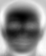

In [54]:
loading_matrix, factor_matrix, communality, uniqueness, prop_va = manual_fa(ORLface_data, 164)
first_PC = factor_matrix[0:1,:].T


min_value = np.min(first_PC)
max_value = np.max(first_PC)
scaled_pc = (first_PC - min_value) * (255 / (max_value - min_value))

scaled_pc_2D = scaled_pc.reshape(56,46)
img = Image.fromarray(scaled_pc_2D.astype('uint8'))
img.save('r.png', 'PNG')
img.show()

## Question 3
### a
find a oackage to perform PLSR on the AutoMPG dataset. Take 300 cars randomly to build the model and the rest 92 cars to test.
In PLSR, we can see the relationship of multiple x and multiple y altogether, and see if the relashionship are strong and give us high R^2 score.

In [55]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/autompg.csv')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
data = pd.DataFrame(df)

# Split data into training and testing sets
train, test = train_test_split(data, test_size=92)
X_train = train.drop(['mpg', 'car name'], axis=1)
y_train = train['mpg']
X_test = test.drop(['mpg', 'car name'], axis=1)
y_test = test['mpg']

# Fit PLSR model
plsr = PLSRegression(n_components=2)
plsr.fit(X_train, y_train)

# Predict on test set
y_pred = plsr.predict(X_test)
# print(y_pred)
# Print R^2 score
score = plsr.score(X_test, y_test)
print(f'R^2 score: {score:.3f}')


R^2 score: 0.771


We can see that the R^2 is 0.771, which is really a nice number! However, if we take the model year as a part of y, things will be different.

In [56]:
# Split data into training and testing sets
train, test = train_test_split(data, test_size=92, random_state=42)
X_train = train.drop(['mpg', 'car name', 'model year'], axis=1)
y_train = train[['mpg', 'model year']]
X_test = test.drop(['mpg', 'car name', 'model year'], axis=1)
y_test = test[['mpg', 'model year']]

# Fit PLSR model
plsr = PLSRegression(n_components=2)
plsr.fit(X_train, y_train)

# Predict on test set
y_pred = plsr.predict(X_test)
# print(y_pred)
# Print R^2 score
score = plsr.score(X_test, y_test)
print(f'R^2 score: {score:.3f}')


R^2 score: 0.355


We can see the R^2 score drop dramatically. In my opinion, the model year shouldn't be in the dependent part, since it makes the result worse.